Задание
Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.
Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).
Этапы работы:
Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
Сделайте выводы.
Удалите признаки на основании полученных значений, выводов.
Повторите п. 3, п. 4 на измененных данных.
Исследуйте оставленные признаки на выбросы.
Удалите выбросы в случае обнаружения.
Повторите п. 3, п. 4 на измененных данных.
Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
Повторите п. 3, п. 4 на измененных данных.
Сформулируйте выводы по проделанной работе.
Кратко опишите какие преобразования были сделаны с данными.
Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

In [31]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
 
from matplotlib import pyplot as plt
%matplotlib inline
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import math

Загрузим данные в датасет housing

In [32]:
california_housing = fetch_california_housing(as_frame=True)
# print(california_housing.DESCR)

In [33]:
housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

housing.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


Целевую переменную сохраним в housing_target

In [34]:
housing_target = pd.DataFrame(california_housing.target)
housing_target.head(3)

,MedHouseVal
0,4.526
1,3.585
2,3.521


Проверим данные на пропуски 

In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Подготовим функции для нахождения нужных метрик

In [36]:
def get_R2_score_test(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
        model.fit(X_train, y_train)
    return model.score(X_test, y_test)

def get_RMSE_test(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed )  
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred, squared=False)

def get_R2_score_train(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
        model.fit(X_train, y_train)
    return model.score(X_train, y_train)

def get_RMSE_train(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed )  
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
    return mean_squared_error(y_train, y_pred, squared=False)

def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
        sns.pairplot(X[columns])
    pass

Подготовим данные для модели линейной регрессии 

In [37]:
X = housing
y = housing_target

Через готовые фукнции построим модель линейной ригрессии и получим метрики RMSE и R2 на тестовом множестве 

In [38]:
print('RMSE_test = ', get_RMSE_test(X,y, random_seed=42, model=None))
print('R2_test = ', get_R2_score_test(X,y, random_seed=42, model=None))
list_result_rmse = []
list_result_r2 = []
list_result_rmse.append(get_RMSE_test(X,y, random_seed=42, model=None))
list_result_r2.append(get_R2_score_test(X,y, random_seed=42, model=None))

RMSE_test =  0.7455813830127763
R2_test =  0.5957702326061667


Получим метрики RMSE и R2 на обучающем множестве 

In [39]:
print('RMSE_train = ',get_RMSE_train(X,y, random_seed=42, model=None))
print('R2_train = ', get_R2_score_train(X,y, random_seed=42, model=None))
list_result_rmse.append(get_RMSE_train(X,y, random_seed=42, model=None))
list_result_r2.append(get_R2_score_train(X,y, random_seed=42, model=None))

RMSE_train =  0.7196757085831575
R2_train =  0.6093459727972159


График распределения целевой переменной 

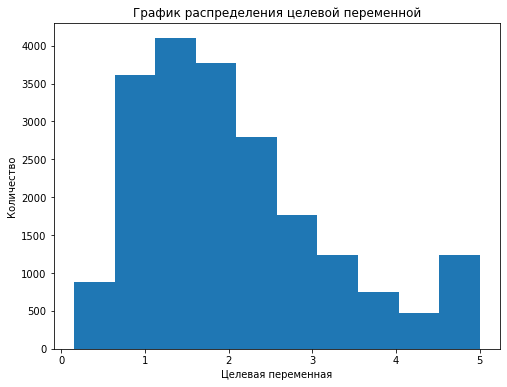

In [40]:
plt.rcParams["figure.figsize"] = (8,6)
plt.title('График распределения целевой переменной')
plt.xlabel('Целевая переменная')
plt.ylabel('Количество')
plt.hist(y)
plt.show()

Вывод по графику: Целевая переменная имеет нормальное распределение и выбросы. 

Посмотрим на выбросы визуально.  

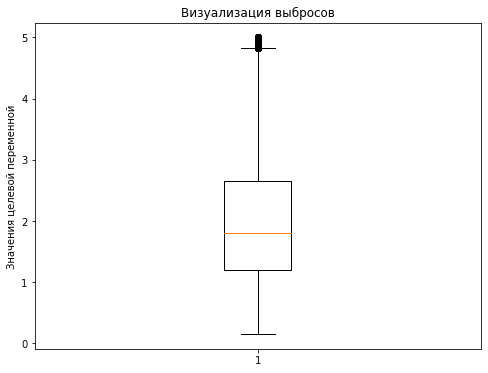

In [41]:
plt.rcParams["figure.figsize"] = (8,6)
plt.boxplot(y)
plt.title('Визуализация выбросов')
plt.ylabel('Значения целевой переменной')
plt.show()

Рассчитаем диапазон выбросов

In [42]:
q1 = y['MedHouseVal'].quantile(0.25)
q3 = y['MedHouseVal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
print(lower_bound)
upper_bound = q3 + (1.5 * iqr)
print(upper_bound)

-0.9808749999999995
4.824124999999999


Посмотрим на  корреляционную матрицу.

In [43]:
housing.corr().style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Сильно коррелированные друг с другом переменные дают модели одну и ту же информацию, поэтому, для анализа не нужно использовать их все. Иначе модель  окажется переобучена (overfit) и предвзята относительно одного отдельного признака.   
В наших данных сильно скоррелированными признаками являются AveBedrms и AveRooms. Также сильную обратную корреляцию имеют Latitude и  Longitude. Удалим эти признаки и обучим модель без их участия.

In [44]:
housing_corr = housing.drop(['AveBedrms','Latitude'], axis=1)
housing_corr.head(3)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,-122.24


Обучим модель и получим метрики для измененых данных на обучающем множестве

In [45]:
X2 = housing_corr

In [46]:
print('RMSE_test = ', get_RMSE_test(X2,y, random_seed=42, model=None))
print('R2_test = ', get_R2_score_test(X2,y, random_seed=42, model=None))
list_result_rmse.append(get_RMSE_test(X2,y, random_seed=42, model=None))
list_result_r2.append(get_R2_score_test(X2,y, random_seed=42, model=None))

RMSE_test =  0.8097659356275917
R2_test =  0.5144861813486294


И на тестовом множестве 

In [47]:
print('RMSE_train = ',get_RMSE_train(X2,y, random_seed=42, model=None))
print('R2_train = ', get_R2_score_train(X2,y, random_seed=42, model=None))
list_result_rmse.append(get_RMSE_train(X2,y, random_seed=42, model=None))
list_result_r2.append(get_R2_score_train(X2,y, random_seed=42, model=None))

RMSE_train =  0.8023610043918035
R2_train =  0.5148020397466025


Проверим признаки на выбросы

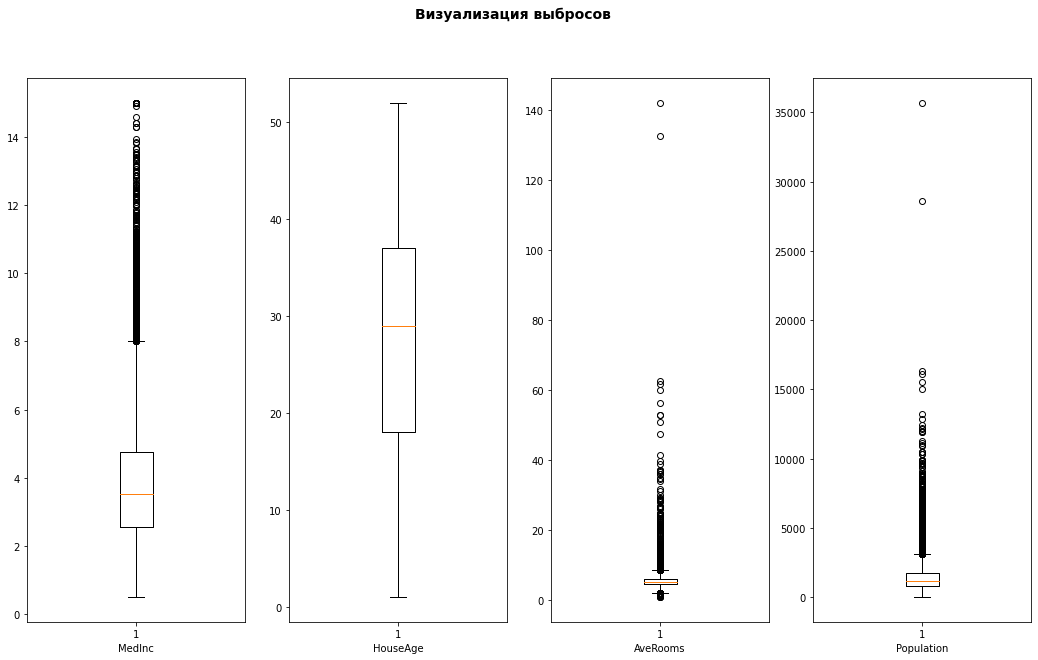

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,10))
ax[0].boxplot(X2['MedInc'])
ax[0].set(ylabel='',xlabel='MedInc',)
ax[1].boxplot(X2['HouseAge'])
ax[1].set(ylabel='',xlabel='HouseAge',)
ax[2].boxplot(X2['AveRooms'])
ax[2].set(ylabel='',xlabel='AveRooms',)
ax[3].boxplot(X2['Population'])
ax[3].set(ylabel='',xlabel='Population',)
fig.suptitle('Визуализация выбросов', fontsize=14, fontweight='bold')
plt.show()

Удалим выбросы с помощью определения стандартного отклонения

In [49]:
X3_outliers = X2[(np.abs(stats.zscore(X2)) < 3).all(axis=1)]
X3_outliers = pd.concat([X3_outliers, y], axis=1, join='inner')
X3_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19820 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19820 non-null  float64
 1   HouseAge     19820 non-null  float64
 2   AveRooms     19820 non-null  float64
 3   Population   19820 non-null  float64
 4   AveOccup     19820 non-null  float64
 5   Longitude    19820 non-null  float64
 6   MedHouseVal  19820 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


Подготовим данные для новой модели 

In [50]:
X3 = X3_outliers.drop(['MedHouseVal'], axis=1)
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19820 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19820 non-null  float64
 1   HouseAge    19820 non-null  float64
 2   AveRooms    19820 non-null  float64
 3   Population  19820 non-null  float64
 4   AveOccup    19820 non-null  float64
 5   Longitude   19820 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [51]:
y3 = X3_outliers['MedHouseVal']

Получим метрики RMSE и R2 на тестовом множестве на данных с удаленными выбросами

In [52]:
print('RMSE_test = ', get_RMSE_test(X3,y3, random_seed=42, model=None))
print('R2_test = ', get_R2_score_test(X3,y3, random_seed=42, model=None))
list_result_rmse.append(get_RMSE_test(X3,y3, random_seed=42, model=None))
list_result_r2.append(get_R2_score_test(X3,y3, random_seed=42, model=None))

RMSE_test =  0.7517204987941162
R2_test =  0.5561049302015569


Получим метрики RMSE и R2 на обучающем множестве на данных с удаленными выбросами

In [53]:
print('RMSE_train = ',get_RMSE_train(X3,y3, random_seed=42, model=None))
print('R2_train = ', get_R2_score_train(X3,y3, random_seed=42, model=None))
list_result_rmse.append(get_RMSE_train(X3,y3, random_seed=42, model=None))
list_result_r2.append(get_R2_score_train(X3,y3, random_seed=42, model=None))

RMSE_train =  0.7436064850639136
R2_train =  0.5434549534097028


Изменим математически признаки MedInc и HouseAge возведением в квадрат

In [54]:
X3[['MedInc', 'HouseAge']] = X3[['MedInc', 'HouseAge']].apply(lambda x: x**2)
X3.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Longitude
0,69.308955,1681.0,6.984127,322.0,2.555556,-122.23
1,68.913242,441.0,6.238137,2401.0,2.109842,-122.22
2,52.669855,2704.0,8.288136,496.0,2.802260,-122.24
3,31.844578,2704.0,5.817352,558.0,2.547945,-122.25
4,14.793254,2704.0,6.281853,565.0,2.181467,-122.25


In [55]:
X4 = pd.DataFrame(X3)
X4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19820 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19820 non-null  float64
 1   HouseAge    19820 non-null  float64
 2   AveRooms    19820 non-null  float64
 3   Population  19820 non-null  float64
 4   AveOccup    19820 non-null  float64
 5   Longitude   19820 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


Получим метрики RMSE и R2 на тестовом  и обучающем множестве на данных с измененными признаками

In [56]:
print('RMSE_test = ', get_RMSE_test(X4,y3, random_seed=42, model=None))
print('R2_test = ', get_R2_score_test(X4,y3, random_seed=42, model=None))
print('RMSE_train = ',get_RMSE_train(X4,y3, random_seed=42, model=None))
print('R2_train = ', get_R2_score_train(X4,y3, random_seed=42, model=None))
list_result_rmse.append(get_RMSE_test(X4,y3, random_seed=42, model=None))
list_result_r2.append(get_R2_score_test(X4,y3, random_seed=42, model=None))
list_result_rmse.append(get_RMSE_train(X4,y3, random_seed=42, model=None))
list_result_r2.append(get_R2_score_train(X4,y3, random_seed=42, model=None))

RMSE_test =  0.7703697463381973
R2_test =  0.5382321477824943
RMSE_train =  0.7534832380621926
R2_train =  0.5307800893298273


Создаем датафрейм с результами

In [57]:
df_result = pd.DataFrame({
    'Model': ['№1-Test', '№1-Train', '№2-Test', '№2-Train', '№3-Test', '№3-Train', '№4-Test', '№4-Train'], 
    'RMSE': list_result_rmse,
    'R2': list_result_r2,
    'Fetch':[california_housing.feature_names,california_housing.feature_names,
             list(housing_corr.columns),list(housing_corr.columns),
             list(housing_corr.columns + ' - remove_outliers'),list(housing_corr.columns + ' - remove_outliers'),
             ['MedInc - squaring','HouseAge - squaring','AveRooms','Population','AveOccup','Longitude'],
             ['MedInc - squaring','HouseAge - squaring','AveRooms','Population','AveOccup','Longitude']]
                        })

In [58]:
pd.set_option('display.max_colwidth', None)
df_result

,Model,RMSE,R2,Fetch
0,№1-Test,0.745581,0.595770,"[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]"
1,№1-Train,0.719676,0.609346,"[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]"
2,№2-Test,0.809766,0.514486,"[MedInc, HouseAge, AveRooms, Population, AveOccup, Longitude]"
3,№2-Train,0.802361,0.514802,"[MedInc, HouseAge, AveRooms, Population, AveOccup, Longitude]"
4,№3-Test,0.751720,0.556105,"[MedInc - remove_outliers, HouseAge - remove_outliers, AveRooms - remove_outliers, Population - remove_outliers, AveOccup - remove_outliers, Longitude - remove_outliers]"
5,№3-Train,0.743606,0.543455,"[MedInc - remove_outliers, HouseAge - remove_outliers, AveRooms - remove_outliers, Population - remove_outliers, AveOccup - remove_outliers, Longitude - remove_outliers]"
6,№4-Test,0.770370,0.538232,"[MedInc - squaring, HouseAge - squaring, AveRooms, Population, AveOccup, Longitude]"
7,№4-Train,0.753483,0.530780,"[MedInc - squaring, HouseAge - squaring, AveRooms, Population, AveOccup, Longitude]"


#### Вывод: 
В данной работе было создано 4 модели линейной регрессии для выбранных данных.   
1. Модель на первоначальных данных без каких либо преобразований   
2. Модель на данных с удалением одного из сильно скоррелированых признаков. Данное преобразование дало улучшение метрик
3. Модель на данных с удалением выбросов. Что дало ухудшение метрик от предыдущей модели
4. Модель на данных с математическим преобразованием некоторых признаков. Что дало улучшение метрик от предыдущей модели